In [1]:
#importing packages
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 

from warnings import filterwarnings
filterwarnings('ignore')
import cartopy.crs as ccrs
import cartopy.feature as cfeature 

In [2]:
ds_Pakistan = xr.open_mfdataset('C:/Users/HP/Desktop/PAKISTAN/*.nc')

In [3]:
import netCDF4 as nc
from netCDF4 import Dataset

In [4]:
ds_Pakistan.to_netcdf('PAKISTAN.nc')

In [5]:
# Load daily rainfall data for Pakistan
ds_Pakistan=xr.open_dataset('PAKISTAN.nc')
ds=ds_Pakistan.precip
ds=ds.where(ds !=-99.0)
ds

<xarray.DataArray 'precip' (datetime: 3652, lat: 56, lon: 67)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * lon       (lon) float32 60.75 61.0 61.25 61.5 ... 76.5 76.75 77.0 77.25
  * lat       (lat) float32 37.5 37.25 37.0 36.75 36.5 ... 24.5 24.25 24.0 23.75
  * datetime  (datetime) datetime64[ns] 2010-01-01 2010-01-02 ... 2019-12-31
Attributes:
    grid_mapping:  crs

In [6]:
# Computing the monthly rainfall totals and climatologies
monthly_totals = ds.groupby('datetime.month').sum('datetime')
monthly_climatologies = monthly_totals.mean('month')

In [7]:
# Computing the annual totals and averages across the Pakistan
annual_totals = ds.groupby('datetime.year').sum('datetime')
annual_averages = annual_totals.mean('year')

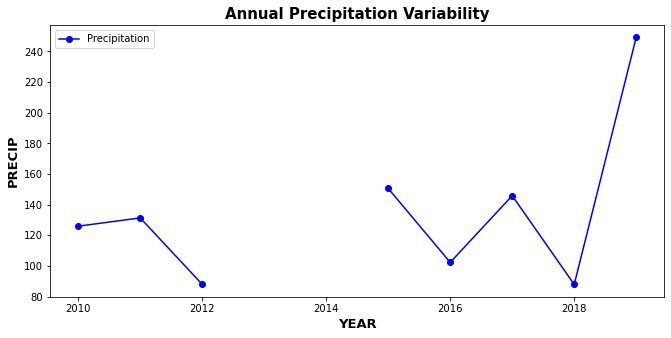

In [36]:
#plotting time series
fig,ax = plt.subplots(figsize = (11,5))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(annual_totals.year,annual_totals.mean(['lon','lat']),color = 'blue', lw = 1.5 ,label= 'Precipitation',marker='o')
ax.set_title('Annual Precipitation Variability', fontweight = 'bold', fontsize=15 ,color = 'Black')
ax.set_xlabel("YEAR", fontweight = 'bold',fontsize = 13, color= 'Black')
ax.set_ylabel('PRECIP', fontweight = 'bold', fontsize = 13, color= 'Black')
plt.legend()
plt.savefig('Done.jpeg');

In [37]:
#Computing the dry and wet days per month and per year
drydays_peryear = ds.where(ds < 1).groupby('datetime.year').count('datetime')
wetdays_peryear = ds.where(ds >= 1).groupby('datetime.year').count('datetime')
drydays_permonth = ds.where(ds < 1).groupby('datetime.month').count('datetime')
wetdays_permonth = ds.where(ds >= 1).groupby('datetime.month').count('datetime')






In [38]:
# Computing the extreme rainfall days (RR > 10mm and RR > 20mm)
extreme_days_10mm = ds.where(ds > 10).groupby('datetime.year').count('datetime')
extreme_days_20mm = ds.where(ds > 20).groupby('datetime.year').count('datetime')

# Extreme Rainfall >10mm per month
extreme_rr10mm_days = ds.where(ds > 10).groupby('datetime.month').count('datetime')
# Extreme Rainfall >20mm per month
extreme_rr20mm_days = ds.where(ds > 20).groupby('datetime.month').count('datetime')




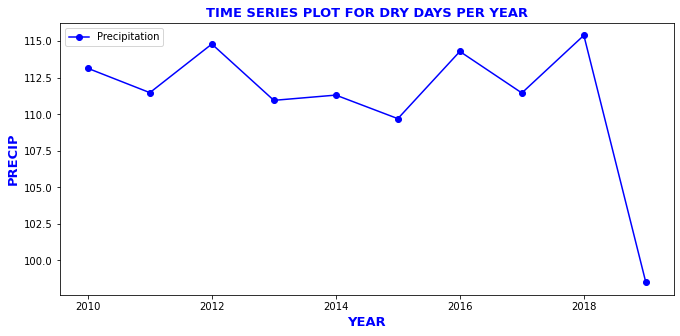

In [39]:
#plotting time series for drydays per year
fig,ax = plt.subplots(figsize = (11,5))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(annual_totals.year,drydays_peryear.mean(['lon','lat']),color = 'blue', lw = 1.5 ,label= 'Precipitation',marker='o')
ax.set_title('TIME SERIES PLOT FOR DRY DAYS PER YEAR', fontweight = 'bold', fontsize=13 ,color = 'blue')
ax.set_xlabel("YEAR", fontweight = 'bold',fontsize = 13, color= 'blue')
ax.set_ylabel('PRECIP', fontweight = 'bold', fontsize = 13, color= 'blue')
plt.legend()

plt.savefig('Done1.jpeg');

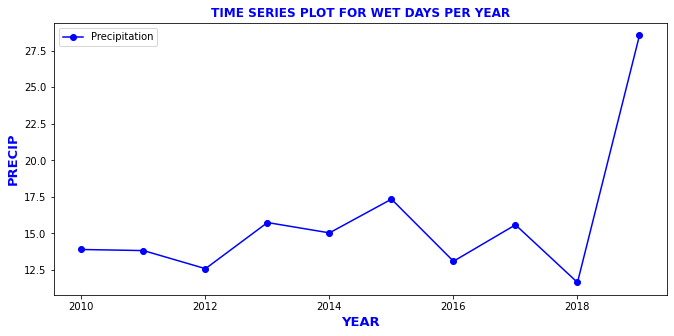

In [40]:
#plotting time series for wet days per year
fig,ax = plt.subplots(figsize = (11,5))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(annual_totals.year,wetdays_peryear.mean(['lon','lat']),color = 'blue', lw = 1.5 ,label= 'Precipitation',marker='o')
ax.set_title('TIME SERIES PLOT FOR WET DAYS PER YEAR', fontweight = 'bold', fontsize=12 ,color = 'blue')
ax.set_xlabel("YEAR", fontweight = 'bold',fontsize = 13, color= 'blue')
ax.set_ylabel('PRECIP', fontweight = 'bold', fontsize = 13, color= 'blue')
plt.legend()
plt.savefig('Done2.jpeg');

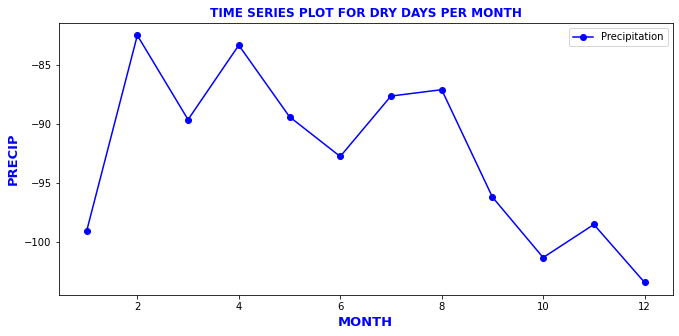

In [41]:
#plotting time series for dry days per month
fig,ax = plt.subplots(figsize = (11,5))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(monthly_totals.month,drydays_permonth.mean(['lon','lat'])*-1,color = 'blue', lw = 1.5 ,label= 'Precipitation',marker='o')
ax.set_title('TIME SERIES PLOT FOR DRY DAYS PER MONTH', fontweight = 'bold', fontsize=12 ,color = 'Blue')
ax.set_xlabel("MONTH", fontweight = 'bold',fontsize = 13, color= 'Blue')
ax.set_ylabel('PRECIP', fontweight = 'bold', fontsize = 13, color= 'Blue')
plt.legend()
plt.savefig('Done3.jpeg');

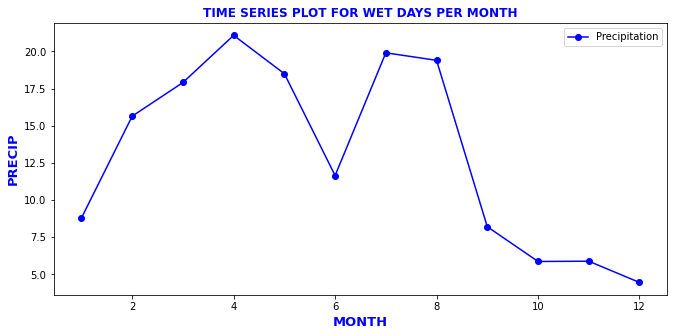

In [42]:
#plotting time series for wet days per month
fig,ax = plt.subplots(figsize = (11,5))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(monthly_totals.month,wetdays_permonth.mean(['lon','lat']),color = 'blue', lw = 1.5 ,label= 'Precipitation',marker='o')
ax.set_title('TIME SERIES PLOT FOR WET DAYS PER MONTH', fontweight = 'bold', fontsize=12 ,color = 'Blue')
ax.set_xlabel("MONTH", fontweight = 'bold',fontsize = 13, color= 'Blue')
ax.set_ylabel('PRECIP', fontweight = 'bold', fontsize = 13, color= 'Blue')
plt.legend()
plt.savefig('Done4.jpeg');

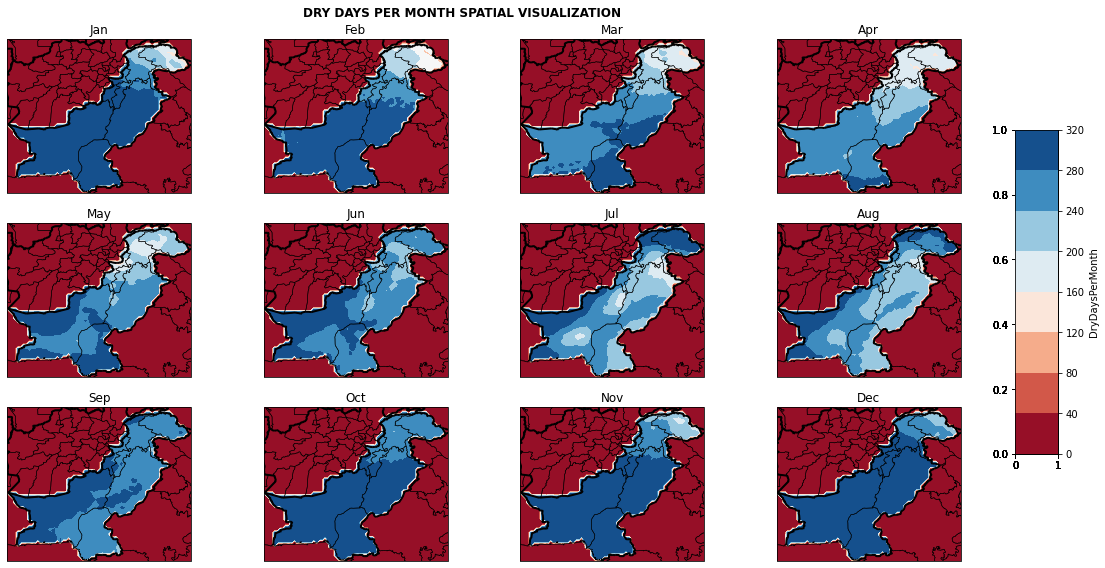

In [43]:
# spatial visualization of dry days per month
fig,ax=plt.subplots(3,4,figsize=(24,9), 
                    subplot_kw={'projection': ccrs.PlateCarree()},squeeze=0.1)
ax=ax.flatten()
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
    ax[i].set_extent([60.75,77.25,37.5,23.75])
    
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(drydays_permonth.lon, drydays_permonth.lat, drydays_permonth[i],
                       cmap='RdBu', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='DryDaysPerMonth')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('DRY DAYS PER MONTH SPATIAL VISUALIZATION', fontweight='bold');
plt.savefig('Done5.jpeg');

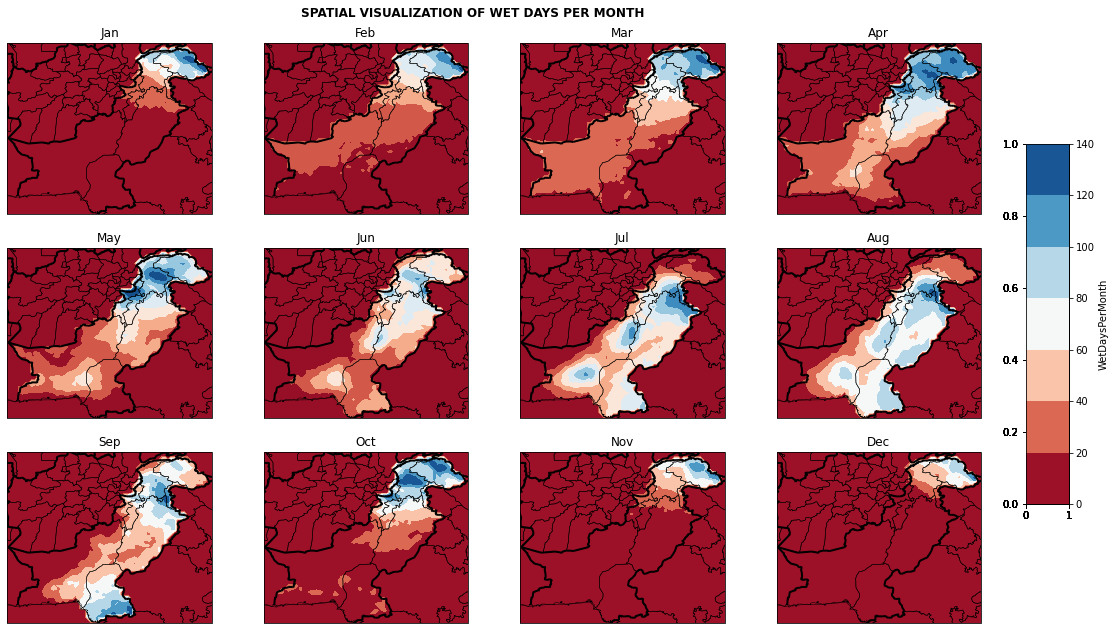

In [44]:
# spatial visualization of wet days per month
fig,ax=plt.subplots(3,4,figsize=(24,10), 
                    subplot_kw={'projection': ccrs.PlateCarree()},squeeze=0.1)
ax=ax.flatten()
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
#     ax[i].add_feature(cfeature.OCEAN)
#     ax[i].add_feature(cfeature.LAKES, color='blue')
#     ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([60.75,77.25,37.5,23.75])
    
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(wetdays_permonth.lon, wetdays_permonth.lat, wetdays_permonth[i],
                       cmap='RdBu', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='WetDaysPerMonth')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('SPATIAL VISUALIZATION OF WET DAYS PER MONTH', fontweight='bold');
plt.savefig('don6.png');

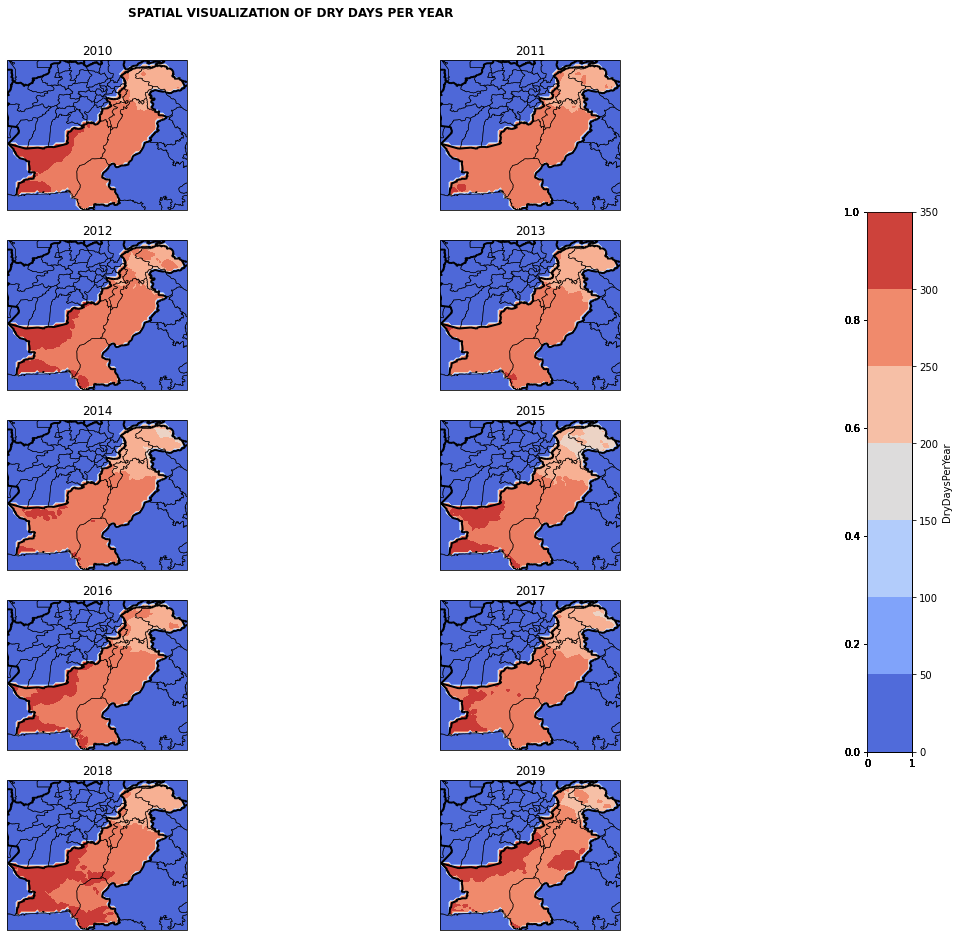

In [45]:
# spatial visualization of dry days per year
fig,ax=plt.subplots(5,2,figsize=(25,15), 
                    subplot_kw={'projection': ccrs.PlateCarree()})
ax=ax.flatten()
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct']
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
#     ax[i].add_feature(cfeature.OCEAN)
#     ax[i].add_feature(cfeature.LAKES, color='blue')
#     ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([60.75,77.25,37.5,23.75])
    ax[i].set_title(annual_totals.year.data[i])
    cb= ax[i].contourf(drydays_peryear.lon, drydays_peryear.lat, drydays_peryear[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='DryDaysPerYear')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('SPATIAL VISUALIZATION OF DRY DAYS PER YEAR', fontweight='bold');
plt.savefig('done7.png');

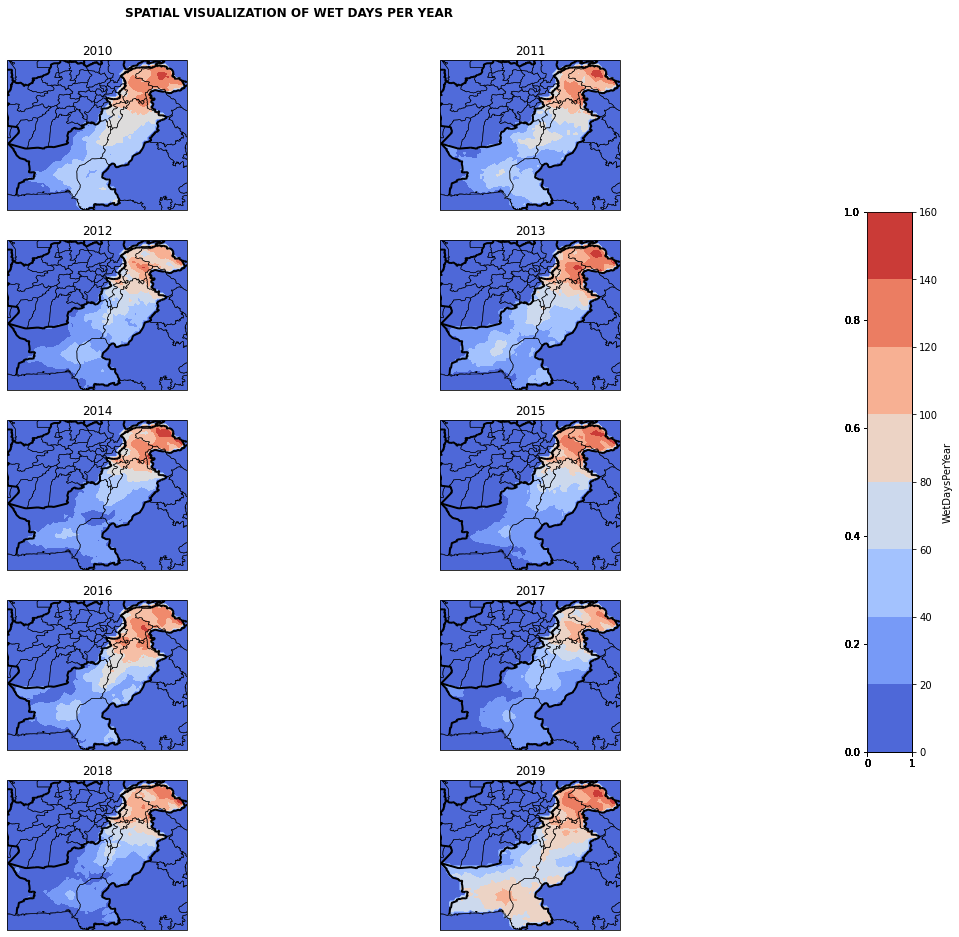

In [46]:
# spatial visualization OF wet days per year
fig,ax=plt.subplots(5,2,figsize=(25,15), 
                    subplot_kw={'projection': ccrs.PlateCarree()})
ax=ax.flatten()
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct']
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
#     ax[i].add_feature(cfeature.OCEAN)
#     ax[i].add_feature(cfeature.LAKES, color='blue')
#     ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([60.75,77.25,37.5,23.75])
    ax[i].set_title(annual_totals.year.data[i])
    cb= ax[i].contourf(wetdays_peryear.lon, wetdays_peryear.lat, wetdays_peryear[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='WetDaysPerYear')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('SPATIAL VISUALIZATION OF WET DAYS PER YEAR ', fontweight='bold');
plt.savefig('done8.png');

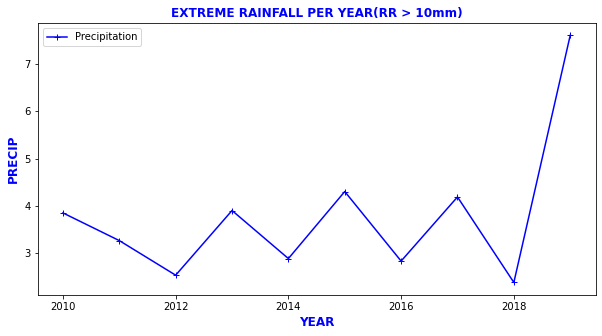

In [47]:
#plotting time series for extreme dry days per year(RR > 10mm)
fig,ax = plt.subplots(figsize = (10,5))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(extreme_days_10mm.year,extreme_days_10mm.mean(['lon','lat']),color = 'blue', lw = 1.5 ,label= 'Precipitation',marker='+')
ax.set_title('EXTREME RAINFALL PER YEAR(RR > 10mm)', fontweight = 'bold', fontsize=12 ,color = 'Blue')
ax.set_xlabel("YEAR", fontweight = 'bold',fontsize = 12, color= 'Blue')
ax.set_ylabel('PRECIP', fontweight = 'bold', fontsize = 12, color= 'Blue')
plt.legend()
plt.savefig('Done9.jpeg');

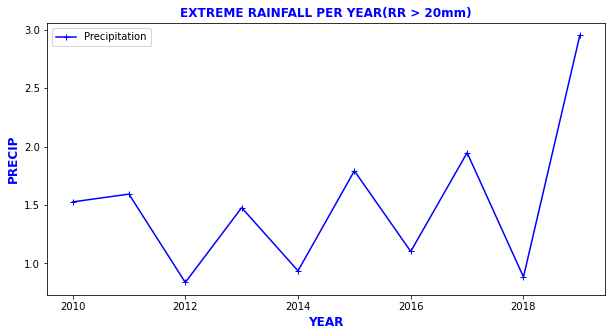

In [48]:
#plotting time series for extreme dry days per year(RR > 20mm)
fig,ax = plt.subplots(figsize = (10,5))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(extreme_days_20mm .year,extreme_days_20mm.mean(['lon','lat']),color = 'blue', lw = 1.5 ,label= 'Precipitation',marker='+')
ax.set_title('EXTREME RAINFALL PER YEAR(RR > 20mm)', fontweight = 'bold', fontsize=12 ,color = 'blue')
ax.set_xlabel("YEAR", fontweight = 'bold',fontsize = 12, color= 'blue')
ax.set_ylabel('PRECIP', fontweight = 'bold', fontsize = 12, color= 'blue')
plt.legend()
plt.savefig('Done10.jpeg');



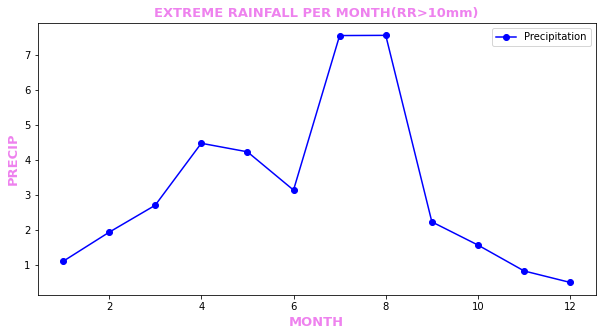

In [49]:
#plotting extreme dry days per month(RR > 10mm)
fig,ax = plt.subplots(figsize = (10,5))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(extreme_rr10mm_days.month,extreme_rr10mm_days.mean(['lon','lat']),color = 'blue', lw = 1.5 ,label= 'Precipitation',marker='o')
ax.set_title('EXTREME RAINFALL PER MONTH(RR>10mm)', fontweight = 'bold', fontsize=13 ,color = 'Violet')
ax.set_xlabel("MONTH", fontweight = 'bold',fontsize = 13, color= 'Violet')
ax.set_ylabel('PRECIP', fontweight = 'bold', fontsize = 13, color= 'Violet')
plt.legend()


plt.savefig('Done11.jpeg');

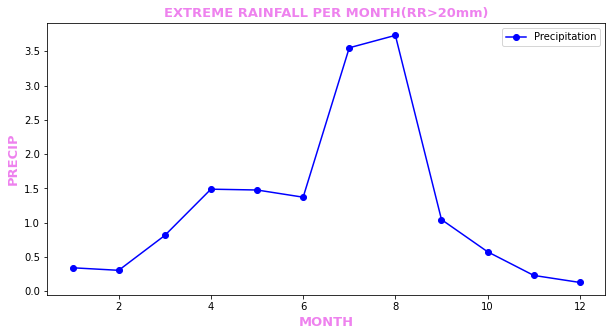

In [50]:
#plotting extreme dry days per month(RR > 20mm)
fig,ax = plt.subplots(figsize = (10,5))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(extreme_rr20mm_days.month,extreme_rr20mm_days.mean(['lon','lat']),color = 'blue', lw = 1.5 ,label= 'Precipitation',marker='o')
ax.set_title('EXTREME RAINFALL PER MONTH(RR>20mm)', fontweight = 'bold', fontsize=13 ,color = 'Violet')
ax.set_xlabel("MONTH", fontweight = 'bold',fontsize = 13, color= 'Violet')
ax.set_ylabel('PRECIP', fontweight = 'bold', fontsize = 13, color= 'Violet')
plt.legend()


plt.savefig('Done12.jpeg');

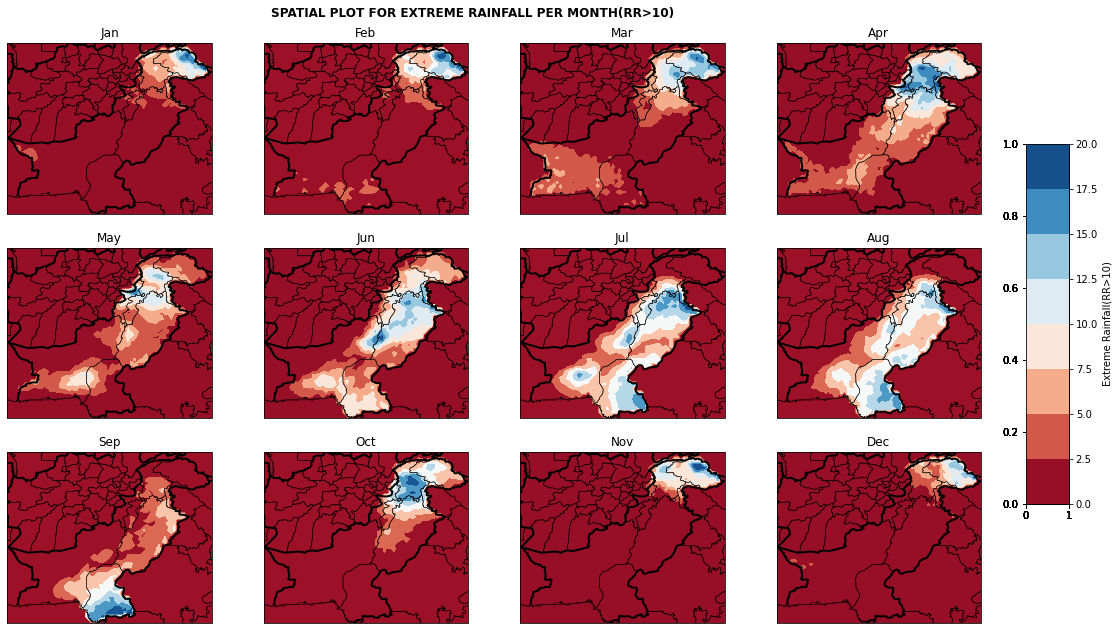

In [51]:
# spatial plots for EXTREME RAINFALL PER MONTH(RR>10)
fig,ax=plt.subplots(3,4,figsize=(24,10), 
                    subplot_kw={'projection': ccrs.PlateCarree()},squeeze=0.1)
ax=ax.flatten()
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
    ax[i].set_extent([60.75,77.25,37.5,23.75])

    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(extreme_rr10mm_days.lon, extreme_rr10mm_days.lat, extreme_rr10mm_days[i],
                       cmap='RdBu', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Extreme Rainfall(RR>10)')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('SPATIAL PLOT FOR EXTREME RAINFALL PER MONTH(RR>10)', fontweight='bold');
plt.savefig('done13.png');



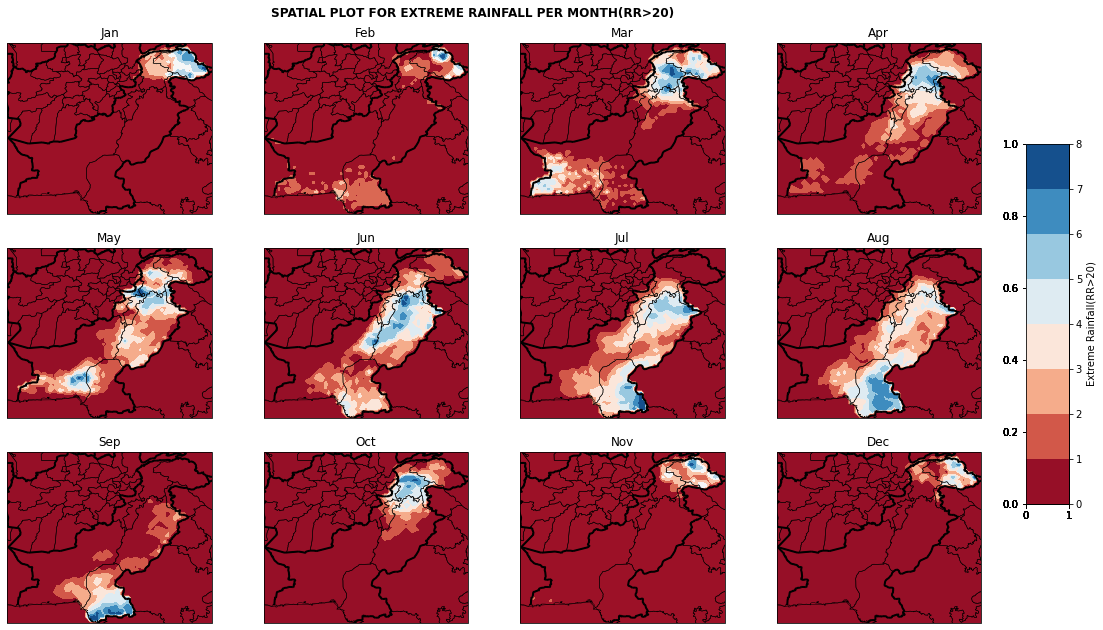

In [52]:
# spatial plots for EXTREME RAINFALL PER MONTH(RR>20)
fig,ax=plt.subplots(3,4,figsize=(24,10), 
                    subplot_kw={'projection': ccrs.PlateCarree()},squeeze=0.1)
ax=ax.flatten()
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
    ax[i].set_extent([60.75,77.25,37.5,23.75])

    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(extreme_rr20mm_days.lon, extreme_rr20mm_days.lat, extreme_rr20mm_days[i],
                       cmap='RdBu', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Extreme Rainfall(RR>20)')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('SPATIAL PLOT FOR EXTREME RAINFALL PER MONTH(RR>20)', fontweight='bold');
plt.savefig('done14.png');



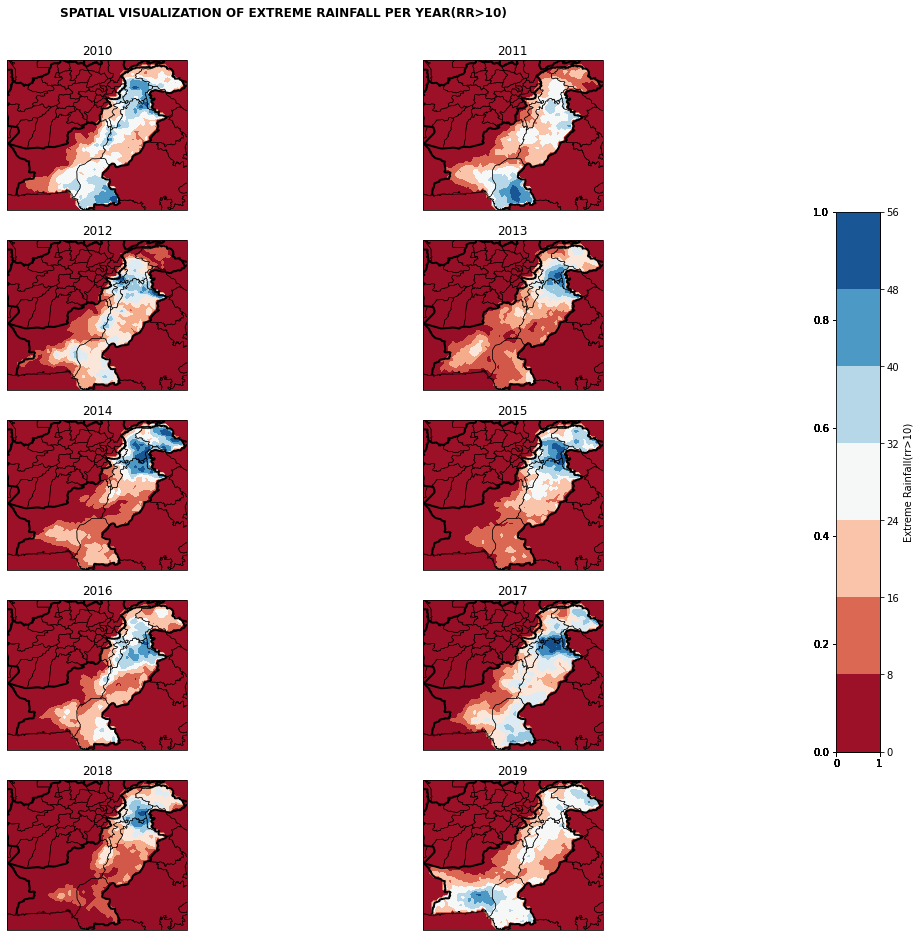

In [53]:
# spatial plots for Extreme days per year(rr>10)
fig,ax=plt.subplots(5,2,figsize=(24,15), 
                    subplot_kw={'projection': ccrs.PlateCarree()})
ax=ax.flatten()
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct']
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)

    ax[i].set_extent([60.75,77.25,37.5,23.75])
    ax[i].set_title(annual_totals.year.data[i])
    cb= ax[i].contourf(extreme_days_10mm.lon, extreme_days_10mm.lat, extreme_days_10mm[i],
                       cmap='RdBu', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Extreme Rainfall(rr>10)')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('SPATIAL VISUALIZATION OF EXTREME RAINFALL PER YEAR(RR>10)', fontweight='bold');
plt.savefig('done15.png');

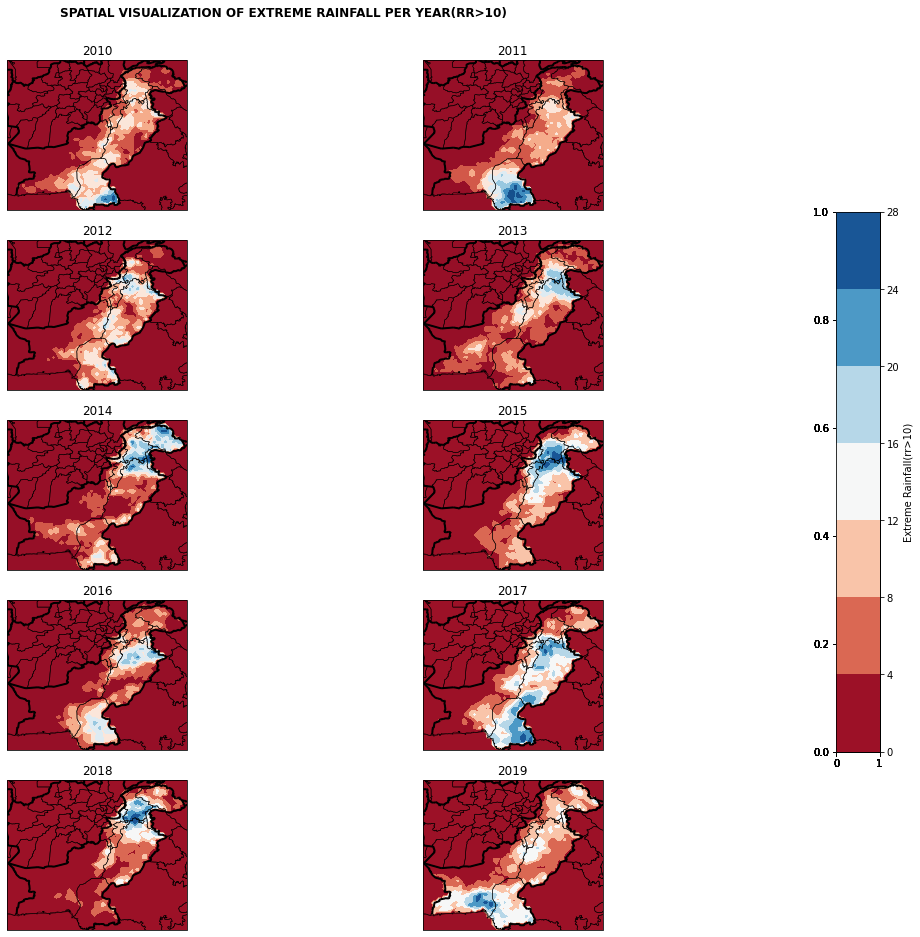

In [55]:
# spatial plots for Extreme days per year(rr>20)
fig,ax=plt.subplots(5,2,figsize=(24,15), 
                    subplot_kw={'projection': ccrs.PlateCarree()})
ax=ax.flatten()
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct']
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)

    ax[i].set_extent([60.75,77.25,37.5,23.75])
    ax[i].set_title(annual_totals.year.data[i])
    cb= ax[i].contourf(extreme_days_20mm.lon, extreme_days_20mm.lat, extreme_days_20mm[i],
                       cmap='RdBu', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Extreme Rainfall(rr>10)')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('SPATIAL VISUALIZATION OF EXTREME RAINFALL PER YEAR(RR>10)', fontweight='bold');
plt.savefig('done16.png');